<h1 align=center> Tarea 9: Clustering

 </h1>

Integrantes:
- Axel Mondaca
- Sebastián Hernández

In [1]:
%pip install hdbscan

     ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
     - -------------------------------------- 0.3/6.9 MB ? eta -:--:--
     --- ------------------------------------ 0.5/6.9 MB 1.5 MB/s eta 0:00:05
     ------ --------------------------------- 1.0/6.9 MB 1.4 MB/s eta 0:00:05
     ------- -------------------------------- 1.3/6.9 MB 1.4 MB/s eta 0:00:04
     ------- -------------------------------- 1.3/6.9 MB 1.4 MB/s eta 0:00:04
     ---------- ----------------------------- 1.8/6.9 MB 1.3 MB/s eta 0:00:04
     ------------ --------------------------- 2.1/6.9 MB 1.3 MB/s eta 0:00:04
     ------------- -------------------------- 2.4/6.9 MB 1.3 MB/s eta 0:00:04
     ------------- -------------------------- 2.4/6.9 MB 1.3 MB/s eta 0:00:04
     --------------- ------------------------ 2.6/6.9 MB 1.3 MB/s eta 0:00:04
     ---------------- ----------------------- 2.9/6.9 MB 1.3 MB/s eta 0:00:04
     --

  error: subprocess-exited-with-error
  
  × Building wheel for hdbscan (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [39 lines of output]
      C:\Users\axel0\AppData\Local\Temp\pip-build-env-qvpjtf80\overlay\Lib\site-packages\setuptools\_distutils\dist.py:289: UserWarning: Unknown distribution option: 'test_suite'
        warnings.warn(msg)
      C:\Users\axel0\AppData\Local\Temp\pip-build-env-qvpjtf80\overlay\Lib\site-packages\setuptools\_distutils\dist.py:289: UserWarning: Unknown distribution option: 'tests_require'
        warnings.warn(msg)
      C:\Users\axel0\AppData\Local\Temp\pip-build-env-qvpjtf80\overlay\Lib\site-packages\setuptools\dist.py:759: SetuptoolsDeprecationWarning: License classifiers are deprecated.
      !!
      
              ********************************************************************************
              Please consider removing the following classifiers in favor of a SPDX license expression:
      
              License :: 

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import HDBSCAN  # Esto usa la que ya tienes instalada
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



In [4]:
df = pd.read_csv('loans_Tarea9.csv').dropna()
df
X = df
X

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
28633,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30
28634,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19
28635,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28
28636,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26


In [5]:
numerical = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = X.select_dtypes(include=['object', 'category']).columns.tolist()

preproc = ColumnTransformer(
    [("num", StandardScaler(), numerical),
     ("cat", OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1), categorical)]
)
X = preproc.fit_transform(X)

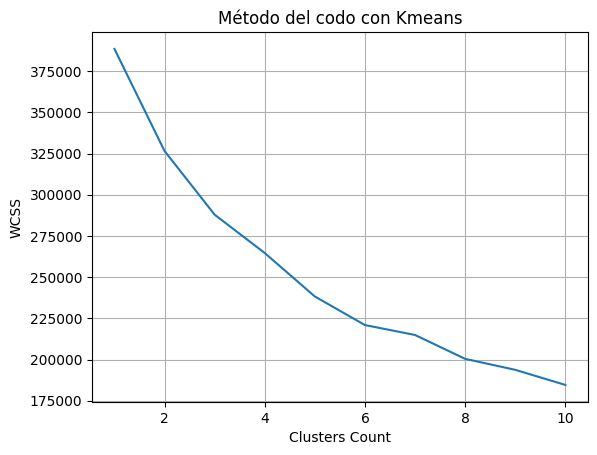

In [6]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=254)
    etiquetas = kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)
    
plt.Figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.xlabel('Clusters Count')
plt.ylabel('WCSS')
plt.title('Método del codo con Kmeans')
plt.grid()

# 1. Clustering sin reducción

In [7]:
#K-means
k = 4
kmeans = KMeans(n_clusters=k, random_state=254)
kmeans_etiquetas = kmeans.fit_predict(X)

In [9]:
#HDBScan
hdbscan_clust = HDBSCAN(min_cluster_size=k)
hdbscan_etiquetas = hdbscan_clust.fit_predict(X)

Reducción

In [10]:
#t-SNE
tsne = TSNE(n_components=2, random_state=254).fit_transform(X)

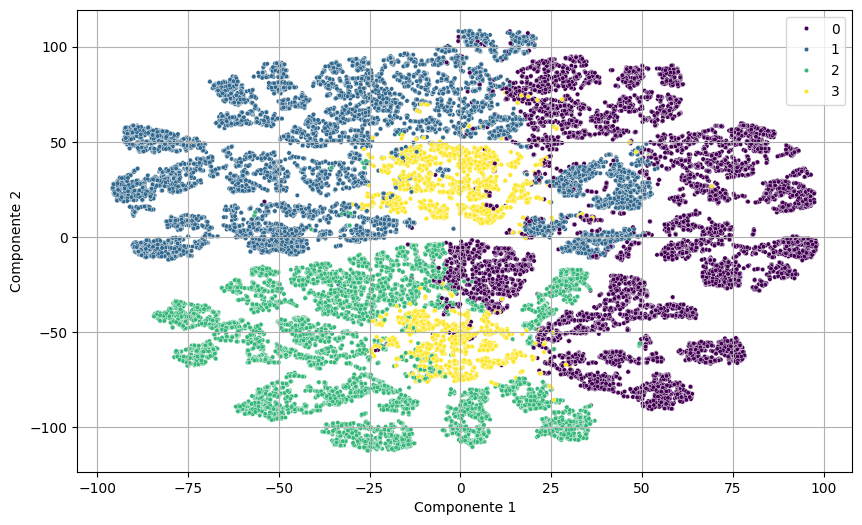

In [11]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=kmeans_etiquetas, palette='viridis', s=10)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()
plt.show()

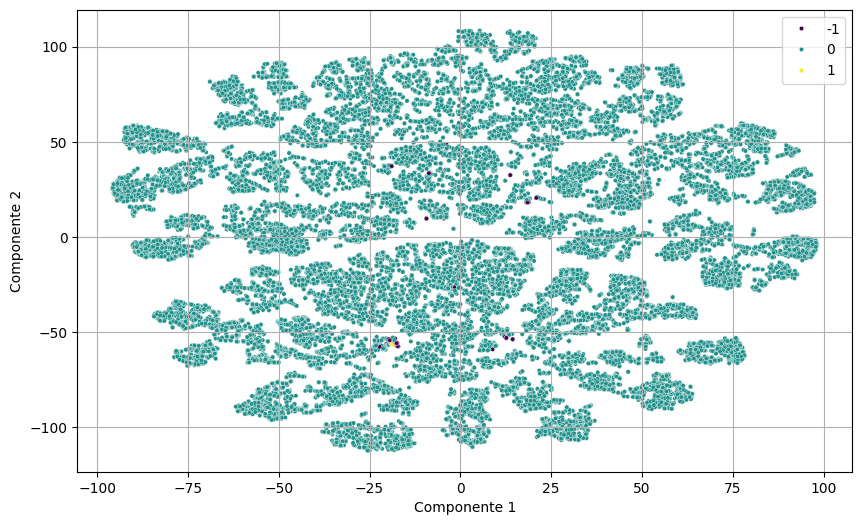

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=hdbscan_etiquetas, palette='viridis', s=10)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()
plt.show()

La técnica que genera agrupamientos más claros basándonos solamente en la visualización 2D es K-Means, debido a que logró agrupar de mejor manera los tipos de clientes en 4 tipos a diferencia de HDBSCAN que lo asigna a solo un cluster.

#  2. Clustering, con reducción de dimensionalidad

In [13]:
#PCA
pca = PCA(n_components=2, random_state=254)
X_pca = pca.fit_transform(X)

In [14]:
# t-SNE
tsne_reducir = TSNE(n_components=2, random_state=254).fit_transform(X) 

In [15]:
kmeans_reducido_tsne = KMeans(n_clusters=k, random_state=254)
kmeans_reducido_etiquetas_tsne = kmeans_reducido_tsne.fit_predict(tsne_reducir)

kmeans_reducido_PCA = KMeans(n_clusters=k, random_state=254)
kmeans_reducido_etiquetas_PCA = kmeans_reducido_PCA.fit_predict(X_pca)

In [16]:
hdbscan_clust_reducido_tsne = HDBSCAN(min_cluster_size=k)
hdbscan_reducido_etiquetas_tsne = hdbscan_clust_reducido_tsne.fit_predict(tsne_reducir)

hdbscan_clust_reducido_PCA = HDBSCAN(min_cluster_size=k)
hdbscan_reducido_etiquetas_PCA = hdbscan_clust_reducido_PCA.fit_predict(X_pca)

### Visualización: Clustering con reducción de dimensionalidad PCA

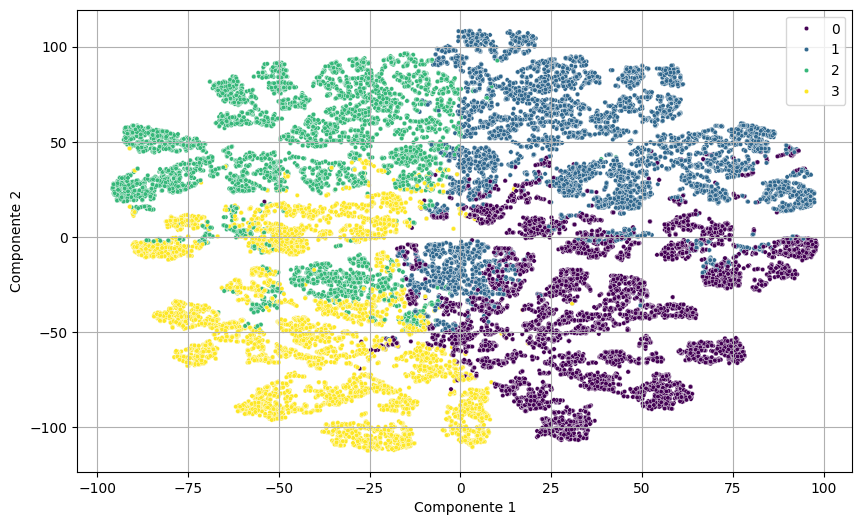

In [17]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=kmeans_reducido_etiquetas_PCA, palette='viridis', s=10)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()
plt.show()

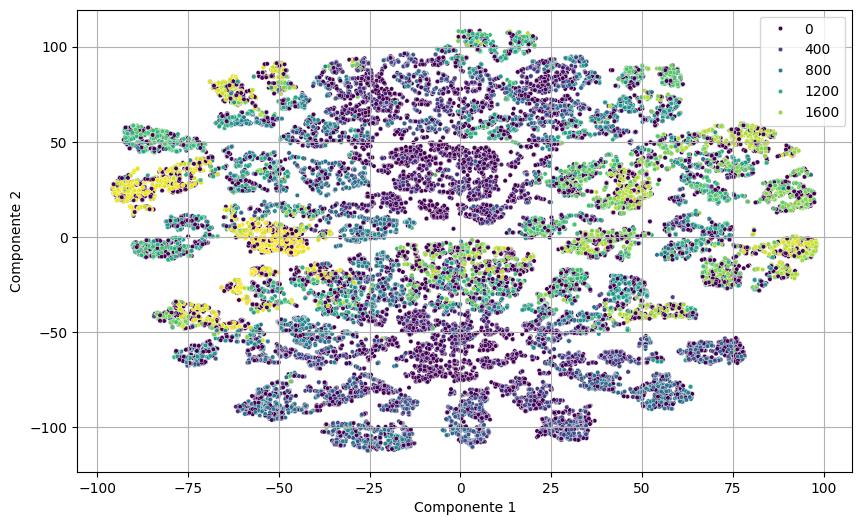

In [18]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=hdbscan_reducido_etiquetas_PCA, palette='viridis', s=10)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()
plt.show()

### Visualización: Clustering con reducción de dimensionalidad t-SNE

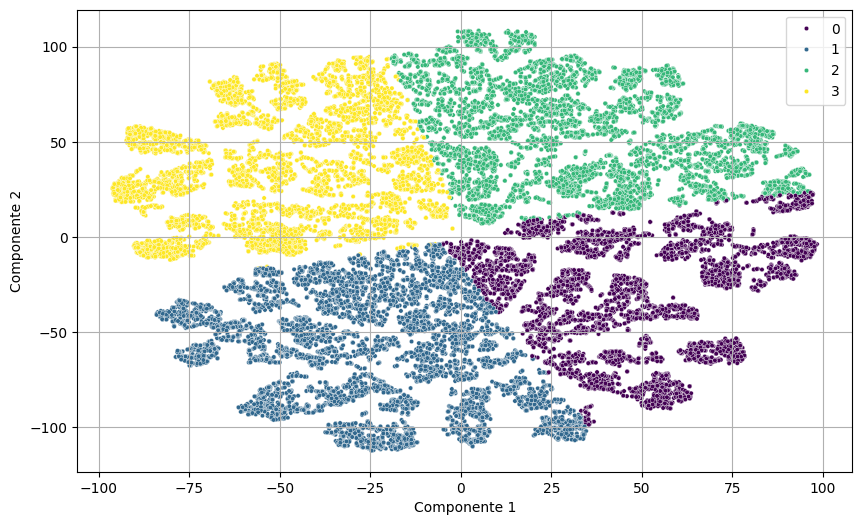

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=kmeans_reducido_etiquetas_tsne, palette='viridis', s=10)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()
plt.show()

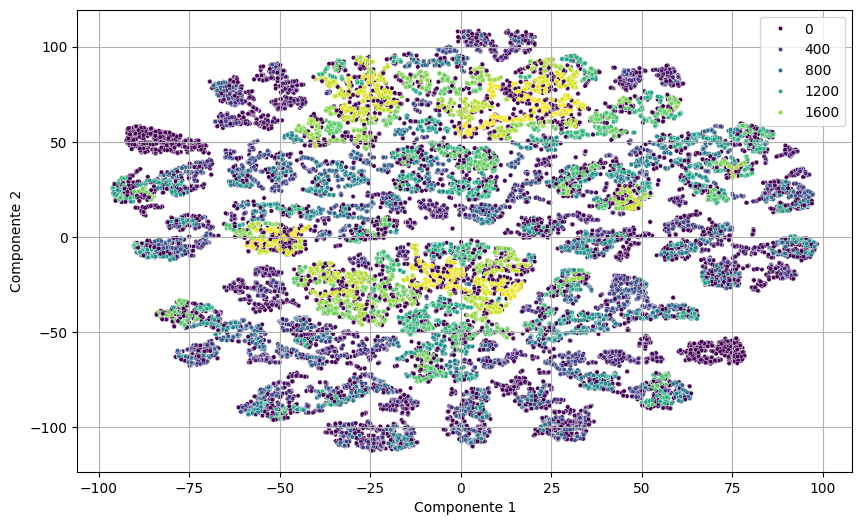

In [22]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=hdbscan_reducido_etiquetas_tsne, palette='viridis', s=10)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()
plt.show()

In [ ]:
silhouette_score(X, kmeans_etiquetas) #0.16399832875521408

0.16399832875521408

In [30]:
silhouette_score(X, kmeans_reducido_etiquetas_PCA) #0.13793308942143254

0.13793308942143254

In [29]:
silhouette_score(X, kmeans_reducido_etiquetas_tsne) #0.13699909898355742


0.13699909898355742

# 3. Pseudo-labeling

In [34]:
df_t8 = pd.read_csv('customers_Tarea8.csv')
df_t8
df_t8["Dt_Customer"] = pd.to_datetime(df_t8["Dt_Customer"], format="%d-%m-%Y")
df_t8["Year"] = df_t8["Dt_Customer"].dt.year
df_t8["Month"] = df_t8["Dt_Customer"].dt.month
df_t8["Day"] = df_t8["Dt_Customer"].dt.day
df_t8 = df_t8.drop(columns=["Dt_Customer"])
df_t8 = df_t8.dropna()
X = df_t8.drop(axis=1, columns=["Response"])

numerical_t8 = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_t8 = X.select_dtypes(include=['object', 'category']).columns.tolist()

preproc_t8 = ColumnTransformer(
    [("num", StandardScaler(), numerical_t8),
     ("cat", OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1), categorical_t8)]
)
X_t8 = preproc_t8.fit_transform(X)

pca_t8 = PCA(n_components=0.95, random_state=254)
X_pca_t8 = pca_t8.fit_transform(X_t8)

kmeans_t8 = KMeans(n_clusters=4, random_state=254, n_init=10)
pseudo_labels = kmeans_t8.fit_predict(X_pca_t8)



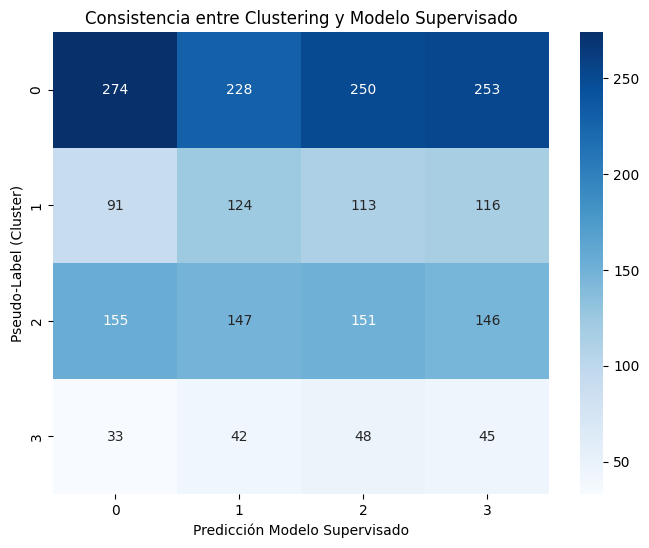

In [36]:
y_pred = np.random.randint(0, 4, size=len(pseudo_labels))

cm = confusion_matrix(pseudo_labels, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción Modelo Supervisado')
plt.ylabel('Pseudo-Label (Cluster)')
plt.title('Consistencia entre Clustering y Modelo Supervisado')
plt.show()

In [37]:
print(classification_report(pseudo_labels, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.27      0.35      1005
           1       0.23      0.28      0.25       444
           2       0.27      0.25      0.26       599
           3       0.08      0.27      0.12       168

    accuracy                           0.27      2216
   macro avg       0.27      0.27      0.25      2216
weighted avg       0.35      0.27      0.29      2216



Para este contexto las técnicas de clustering no son 100% confiables, debido a que tiene un f1-score promedio de 25%, es decir, acierta 1/4 de las veces. Además, obtener una precisión de 27% indica que no hay correlación significativa entre los grupos mediante la utilización de ambos algoritmos, por lo que los cluster y las clases de riesgo son práctimante independientes entre sí.

También las técnicas de clustering son no supervisadas y agrupan datos basado en una distancia geométrica entre sus características, por lo tanto, el algortimo asume que las personas con características similares se comportan igual. Por ejemplo, si dos personas tienen la misma edad, pero tienen distinto riesgo y no se utiliza está variable para aprender.